In [2]:
# solve No module named 'sklearn.externals.joblib'

import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

In [3]:
#import libraries

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.ensemble import RandomForestRegressor

In [4]:
# analyze descriptive statistics

data = pd.read_csv('palm_ffb.csv')

print("Descriptive analysis:")
data.describe()

Descriptive analysis:


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [5]:
# check data type and missing value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


**Note**

*All the features are numerical in nature and there are no missing values.*

In [6]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  8


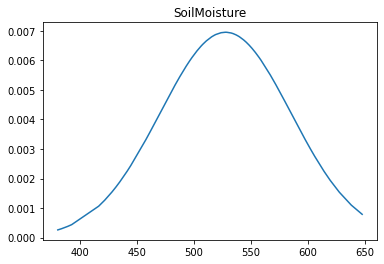

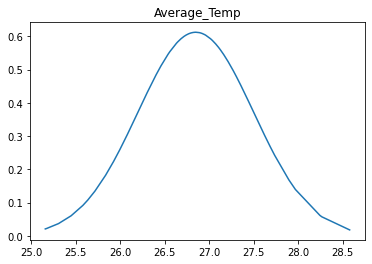

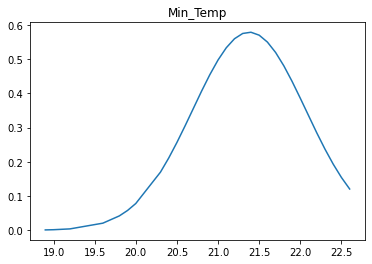

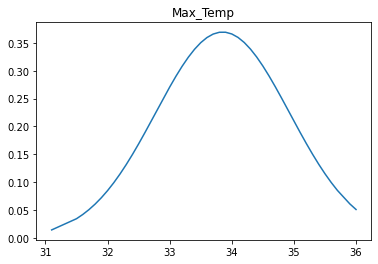

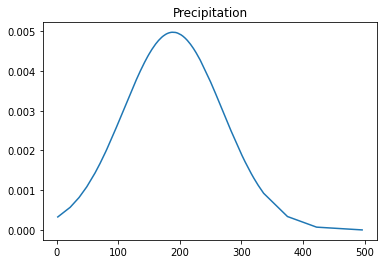

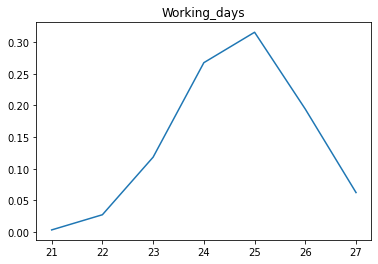

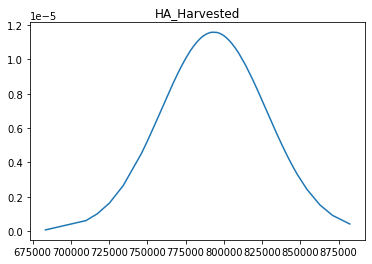

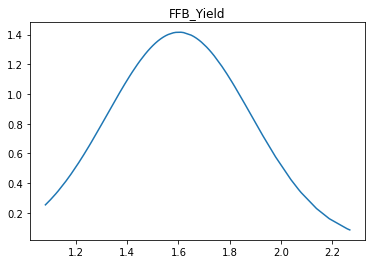

In [7]:
# analyse the distributions of thes data

def analyse_continous(df, var):
    df = df.copy()
    mean = df[var].mean()
    std = df[var].std()
    pdf = norm.pdf(df[var].sort_values(), mean, std)
    plt.plot(df[var].sort_values(), pdf)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

**Note**

*min_temp is slightly skewed to the left(negatively skewed).*

In [8]:
#  list of discrete variables

discrete_vars = [var for var in num_vars if len(data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


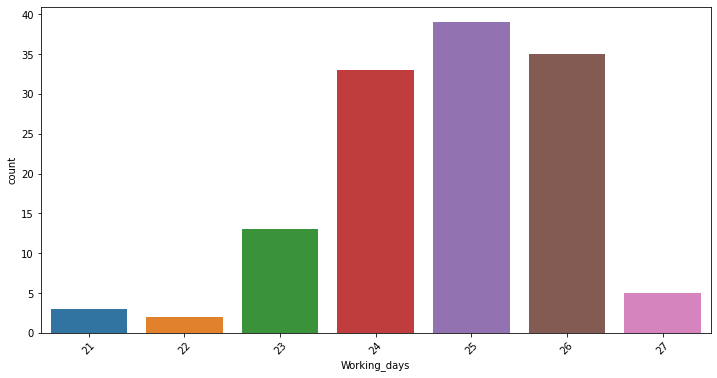

In [9]:
#visualise the discrete variables

plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = data)
xt = plt.xticks(rotation=45)

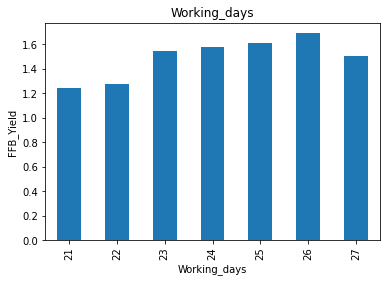

In [10]:
# bar graph working days against FBB yield

def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['FFB_Yield'].median().plot.bar()
    plt.title(var)
    plt.ylabel('FFB_Yield')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

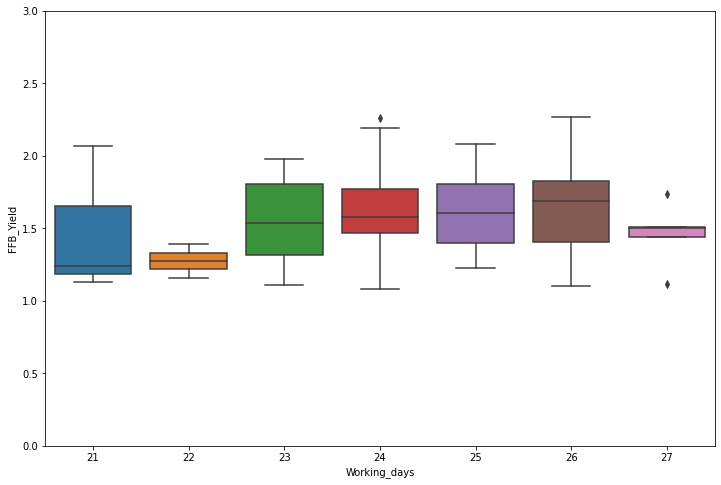

In [11]:
# bloxplot working days against FBB yield

var = 'Working_days'
data_working_days = pd.concat([data['FFB_Yield'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="FFB_Yield", data=data_working_days)
fig.axis(ymin=0, ymax=3);

**Note**

*It seems there is a relationship between working days and FFB yield. The higher the workind days, the higher the FFB Yield. It is clear that with more working days, the median yield increases except for day 27. The maximum yield is generated when working days are equal to 26.*

In [12]:
# list of continuous variables

cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


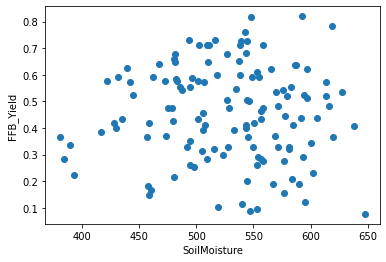

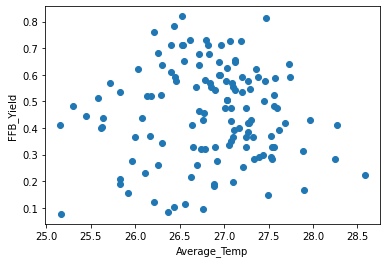

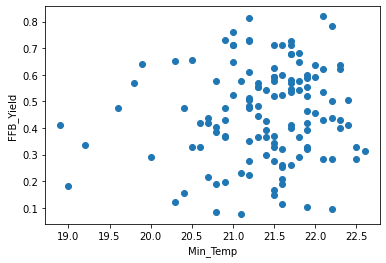

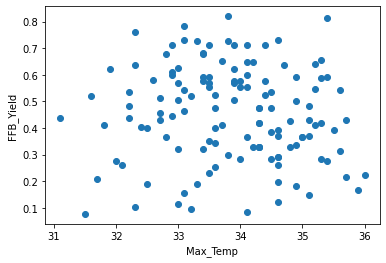

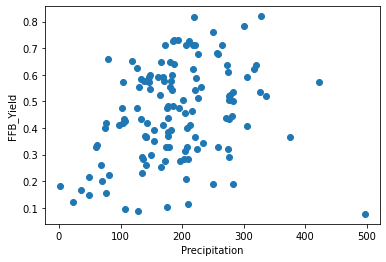

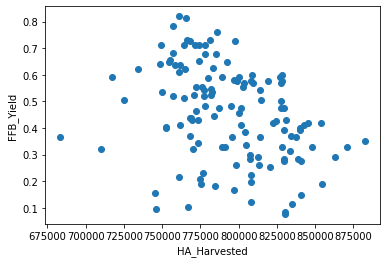

In [13]:
# find relationship between the FFB Yield and continous variables

def non_transform_analyse_continous(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for var in cont_vars:
    if var !='FFB_Yield':
        non_transform_analyse_continous(data, var)

**Note**

*A clear linear relationship can be observed between FFB Yield and Precipitation feature. As precipitation increases so FFB yield is also increase.*

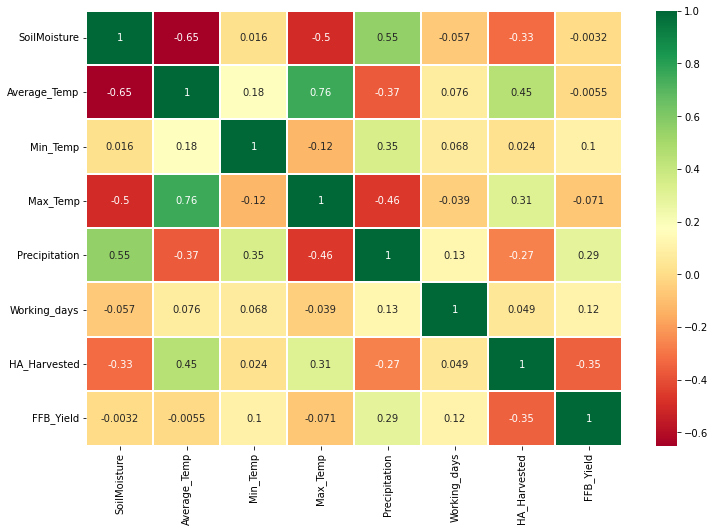

In [14]:
# Using Pearson Correlation

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

**Note**

*Based on the correlation, FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and precipitation.*

In [15]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [16]:
# Filter unimportant column

X = data.drop(['FFB_Yield','Date'],axis=1)
y = data.FFB_Yield

In [17]:
# Check which are the 4 strongest relationship features by using SequentialFeatureSelector

model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s finished

[2022-08-16 06:50:51] Features: 1/4 -- score: -0.15200902985067438[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s finished

[2022-08-16 06:50:55] Features: 2/4 -- score: -0.16739620354865595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished

[2022-08-16 06:50:58] Features: 3/4 -- score: 0.09780187639543605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=4,
                          scoring='r2', verbose=2)

In [18]:
# Get the column name for the selected feature

model.k_feature_names_

('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

**Note**

*Through using SequentialFeatureSelector, it seems there is a slight change in feature importance. HA_Harvested, Precipitation, Working days are still standing strong and Soil moisture is new feature found in the model.*

In [19]:
# using ExhaustiveFeatureSelector

emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2')
miniData=X[X.columns]
emodel.fit(np.array(miniData),y)

Features: 127/127

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=7,
                          scoring='r2')

In [20]:
# Get the column name for the selected feature

miniData.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested'],
      dtype='object')

**Note**

*Through using ExhaustiveFeatureSelector, again here we see Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.*